Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Example 10.36 and Figure 10.14 

Analysis of practical significance for the COVID-19 vaccine randomized trials, website design in the Obama campaign, and two fictitious randomized trials. The confidence intervals are built following Definition 9.44 and Exercise 9.11\
Topics: [Statistical significance](https://www.youtube.com/watch?v=IYqGgHDVHDM), [practical significance](https://www.youtube.com/watch?v=acTMImWTKpQ), [confidence intervals](https://www.youtube.com/watch?v=soWJ3Wti0FM)

Author: Carlos Fernandez-Granda

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
# matplotlib.rcParams['text.usetex'] = True
from scipy.stats import norm

font_size = 15
font_size_legend = 15
font_size_ticks = 15

x_min = -0.5
x_max = 2.5

l_width = 15
msize = 35
verbose = False

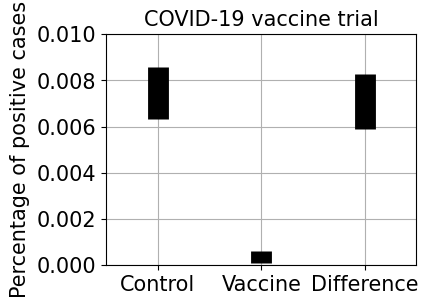

In [2]:
# COVID-19 vaccine clinical trials
# Data source: https://www.nejm.org/doi/full/10.1056/NEJMoa2034577
n_control = 21728
n_vaccine = 21720

cases_control = 162
cases_vaccine = 8

percentage_control = cases_control/n_control
percentage_vaccine = cases_vaccine/n_vaccine

var_control = percentage_control * (1-percentage_control) / n_control
var_vaccine = percentage_vaccine * (1-percentage_vaccine) / n_vaccine
var_difference = var_control + var_vaccine
percentage_difference = percentage_control - percentage_vaccine
Phi_inv = 1.96 # Inverse cdf of 1-0.05/2
half_width_diff = np.sqrt(var_difference) * Phi_inv
half_width_control = np.sqrt(var_control) * Phi_inv
half_width_vaccine = np.sqrt(var_vaccine) * Phi_inv
l_diff = percentage_difference - half_width_diff
u_diff = percentage_difference + half_width_diff
l_control = percentage_control - half_width_control
u_control = percentage_control + half_width_control
l_vaccine = percentage_vaccine - half_width_vaccine
u_vaccine = percentage_vaccine + half_width_vaccine

theta_null = (cases_control+cases_vaccine)/ (n_control+n_vaccine)

var_null = theta_null * (1-theta_null) * (1./n_vaccine + 1./n_vaccine)
std_null = np.sqrt(var_null)

statistic = (percentage_control - percentage_vaccine)

if verbose:
    print("Pooled estimate of parameter under null hypothesis",theta_null)
    print("Variance estimate under null hypothesis",var_null)
    print("Percentage control group",percentage_control)
    print("Percentage vaccine group",percentage_vaccine)
    print("Test statistic",statistic)
    print(statistic/std_null)
    
    print("Variance control",np.round(var_control,3))
    print("Variance vaccine",var_vaccine)
    print("Interval difference: [",l_diff,",",u_diff,"]")
    print("Interval control: [",l_control,",",u_control,"]")
    print("Interval vaccine: [",l_vaccine,",",u_vaccine,"]")

plt.figure(figsize=(4,3))
plt.xticks([0,1,2],["Control","Vaccine","Difference"],fontsize=font_size_ticks)
plt.yticks(fontsize=font_size_ticks) 
plt.xlim(x_min,x_max)
plt.ylim(0,0.01)
plt.ylabel(r"Percentage of positive cases",fontsize=font_size,labelpad=5)
plt.vlines(0,l_control,u_control,lw=l_width,color="black")
plt.vlines(1,l_vaccine,u_vaccine,lw=l_width,color="black")
plt.vlines(2,l_diff,u_diff,lw=l_width,color="black")
plt.grid(True)
plt.title(r"COVID-19 vaccine trial",fontsize=font_size);

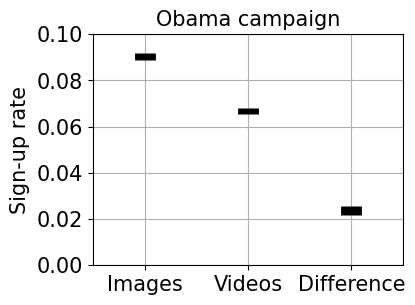

In [6]:
# Website design in the Obama campaign
# Data source: https://www.optimizely.com/insights/blog/how-obama-raised-60-million-by-running-a-simple-experiment/
n_images = 51794 + 51696 + 51790
n_videos = 51427 + 51864 + 51811

signup_images = 4425 + 4996 + 4595
signup_videos = 3992 + 3261 + 3084

percentage_images = signup_images/n_images
percentage_videos = signup_videos/n_videos

var_images = percentage_images * (1-percentage_images) / n_images
var_videos = percentage_videos * (1-percentage_videos) / n_videos
var_difference = var_images + var_videos
percentage_difference = percentage_images - percentage_videos
Phi_inv = 1.96 # Inverse cdf of 1-0.05/2
half_width_diff = np.sqrt(var_difference) * Phi_inv
half_width_images = np.sqrt(var_images) * Phi_inv # 0.5* Phi_inv /np.sqrt(n_images) #
half_width_videos = np.sqrt(var_videos) * Phi_inv # 0.5* Phi_inv /np.sqrt(n_videos) #
l_diff = percentage_difference - half_width_diff
u_diff = percentage_difference + half_width_diff
l_images = percentage_images - half_width_images
u_images = percentage_images + half_width_images
l_videos = percentage_videos - half_width_videos
u_videos = percentage_videos + half_width_videos

if verbose:
    print("Variance images",np.round(var_images,3))
    print("Variance videos",var_videos)
    print("Interval difference: [",l_diff,",",u_diff,"]")
    print("Interval images: [",l_images,",",u_images,"]")
    print("Interval videos: [",l_videos,",",u_videos,"]")

plt.figure(figsize=(4,3))
plt.xticks([0,1,2],["Images","Videos","Difference"],fontsize=font_size_ticks)#, rotation='vertical') 
plt.yticks(fontsize=font_size_ticks) 
plt.xlim(x_min,x_max)
plt.ylim(0,0.1)
plt.ylabel(r"Sign-up rate",fontsize=font_size,labelpad=5)
plt.vlines(0,l_images,u_images,lw=l_width,color="black")
plt.vlines(1,l_videos,u_videos,lw=l_width,color="black")
plt.vlines(2,l_diff,u_diff,lw=l_width,color="black")
plt.grid(True)
plt.title(r"Obama campaign",fontsize=font_size);

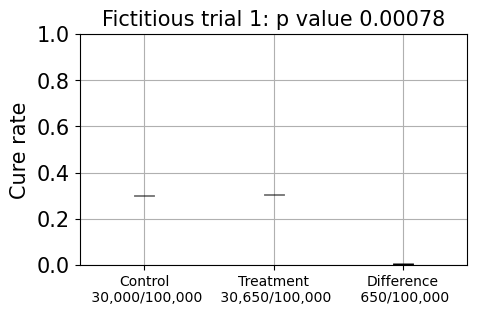

In [7]:
# Fictitious trial 1, which is very large, so that very small differences become statistically significant
n_1 = 100000
n_2 = 100000

x_1 = 30000
x_2 = 30650

theta_null = (x_1 + x_2)/ (n_1+n_2)

var = theta_null * (1-theta_null) * (1./n_1 + 1./n_2)
std_null = np.sqrt(var)

statistic = (x_2/n_2 - x_1/n_1)

p_value = 1-norm.cdf(statistic/std_null)

if verbose:
    print("Test statistic:",statistic)
    print("Standard deviation under null hypothesis:",std_null)
    print("P value:",p_value)

Phi_inv = 1.96 # Inverse cdf of 1-0.05/2

theta_est_1 = x_1/n_1
sample_std_1 = np.sqrt(theta_est_1*(1-theta_est_1))

half_width_1 = 0.5 * Phi_inv / np.sqrt(n_1)
l_1 = theta_est_1 - half_width_1
u_1 = theta_est_1 + half_width_1

theta_est_2 = x_2/n_2
sample_std_2 =  np.sqrt(theta_est_2*(1-theta_est_2))

half_width_2 = 0.5 * Phi_inv / np.sqrt(n_2)
l_2 = theta_est_2 - half_width_2
u_2 = theta_est_2 + half_width_2

std_diff = np.sqrt(theta_est_1*(1-theta_est_1)/n_1 + theta_est_2*(1-theta_est_2)/n_2)
half_width_diff = std_diff * Phi_inv
l_diff = theta_est_2-theta_est_1 - half_width_diff
u_diff = theta_est_2-theta_est_1 + half_width_diff

plt.figure(figsize=(5,3))
plt.xticks([0,1,2],["Control\n 30,000/100,000","Treatment\n 30,650/100,000","Difference\n 650/100,000"],fontsize=font_size_ticks-5)#, rotation='vertical') 
plt.yticks(fontsize=font_size_ticks) 
plt.xlim(x_min,x_max)
plt.ylim(0,1)
plt.ylabel(r"Cure rate",fontsize=font_size,labelpad=5)
plt.vlines(0,l_1,u_1,lw=l_width,color="black")
plt.vlines(1,l_2,u_2,lw=l_width,color="black")
plt.vlines(2,l_diff,u_diff,lw=l_width,color="black")
plt.grid(True)
plt.title(r"Fictitious trial 1: p value " + str(round(p_value,5)),fontsize=font_size)
if verbose:
    print("Control: [",np.round(l_1,4),np.round(u_1,4),"]")
    print("Treatment: [",np.round(l_2,4),np.round(u_2,4),"]")
    print("Difference: [",np.round(l_diff,5),np.round(u_diff,5),"]")

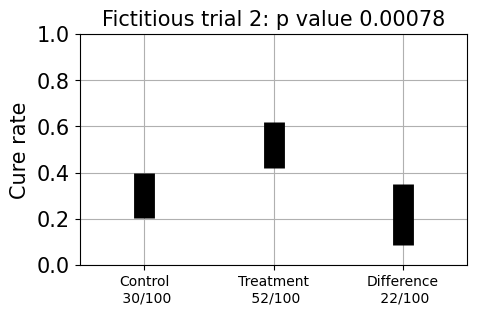

In [8]:
# Fictitious trial 2, which is smaller, so that only larger differences are statistically significant
n_1 = 100
n_2 = 100

x_1 = 30
x_2 = 52

theta_null = (x_1 + x_2)/ (n_1+n_2)

var = theta_null * (1-theta_null) * (1./n_1 + 1./n_2)
std_null = np.sqrt(var)

statistic = (x_2/n_2 - x_1/n_1)

p_value = 1-norm.cdf(statistic/std_null)

if verbose:
    print("Test statistic:",statistic)
    print("Standard deviation under null hypothesis:",std_null)
    print("P value:",p_value)

Phi_inv = 1.96 # Inverse cdf of 1-0.05/2

theta_est_1 = x_1/n_1
sample_std_1 = np.sqrt(theta_est_1*(1-theta_est_1))

half_width_1 = 0.5 * Phi_inv / np.sqrt(n_1)
l_1 = theta_est_1 - half_width_1
u_1 = theta_est_1 + half_width_1

theta_est_2 = x_2/n_2
sample_std_2 = np.sqrt(theta_est_2*(1-theta_est_2))

half_width_2 = 0.5 * Phi_inv / np.sqrt(n_2)
l_2 = theta_est_2 - half_width_2
u_2 = theta_est_2 + half_width_2

std_diff = np.sqrt(theta_est_1*(1-theta_est_1)/n_1 + theta_est_2*(1-theta_est_2)/n_2)
half_width_diff = std_diff * Phi_inv
l_diff = theta_est_2-theta_est_1 - half_width_diff
u_diff = theta_est_2-theta_est_1 + half_width_diff

plt.figure(figsize=(5,3))
plt.xticks([0,1,2],["Control\n 30/100","Treatment\n 52/100","Difference\n 22/100"],fontsize=font_size_ticks-5)#, rotation='vertical') 
plt.yticks(fontsize=font_size_ticks) 
plt.xlim(x_min,x_max)
plt.ylim(0,1)
plt.ylabel(r"Cure rate",fontsize=font_size,labelpad=5)
plt.vlines(0,l_1,u_1,lw=l_width,color="black")
plt.vlines(1,l_2,u_2,lw=l_width,color="black")
plt.vlines(2,l_diff,u_diff,lw=l_width,color="black")
plt.grid(True)
plt.title(r"Fictitious trial 2: p value " + str(round(p_value,5)),fontsize=font_size)
if verbose:
    print("Control: [",np.round(l_1,4),np.round(u_1,4),"]")
    print("Treatment: [",np.round(l_2,4),np.round(u_2,4),"]")
    print("Difference: [",np.round(l_diff,5),np.round(u_diff,5),"]")